## Elektrifiseringen av sokkelen - Lønnsomhetsvurdering Troll B og C 

#### Kanditatnr: 86 

In [16]:
import pandas as pd
from matplotlib import pyplot as plt
import requests
from pyjstat import pyjstat
import seaborn as sns

Denne oppgaven vil utforske elektrifiseringen av sokkelen med et spesielt fokus på plattformene Troll B og C. Hovedmålet er å evaluere om elektrifiseringen av disse plattformene er lønnsom fra et bedriftsøkonomisk perspektiv. Oppgaven vil gjennomføre en lønnsomhetsvurdering basert på ulike strømpris- og karbonprisbaner, for å vurdere den økonomiske levedyktigheten av elektrifiseringen. Gjennom denne analysen vil vi bedre kunne forstå hvilke forutsetninger som kreves for en vellykket implementering. Målet er å bistå beslutningstakere med å ta informerte valg som leder oss mot en mer bærekraftig fremtid samtidig som det opprettholder næringens lønnsomhet.

#### Bakgrunn 

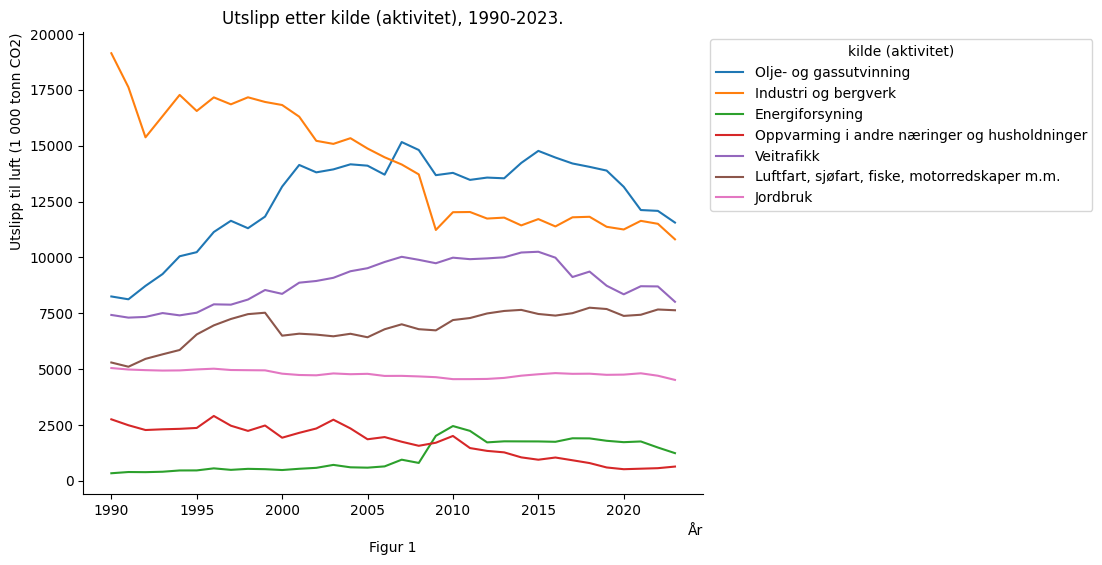

In [17]:
postUrl = 'https://data.ssb.no/api/v0/no/table/13931/'

apiQuery = {
  "query": [
    {
      "code": "UtslpTilLuft",
      "selection": {
        "filter": "vs:UtslpKildeA01",
        "values": [
          "1",
          "2",
          "3",
          "4",
          "5",
          "6",
          "7"
        ]
      }
    },
    {
      "code": "UtslpEnergivare",
      "selection": {
        "filter": "item",
        "values": [
          "VT0"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "UtslippCO2ekvival"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

def apiToDataframe(postUrl, query):

    # postUrl som spørringen skal postes mot
    # Spørringen og endepunktet til API-et kan hentes fra Statistikkbanken.

    res = requests.post(postUrl, json=query)
    # legger resultat i ds. DS har i tillegg en del metadata
    ds = pyjstat.Dataset.read(res.text)
    # skriver resultatet til to dataframes
    # først dataframe med tekst
    df = ds.write('dataframe')
    # deretter dataframe med koder
    df_id = ds.write('dataframe', naming='id')
    # returnerer også ds i tilfelle en trenger metadata
    return df, df_id, ds

utslipp_df, df_id, ds = apiToDataframe(postUrl, apiQuery)

utslipp_df['år'] = pd.to_numeric(utslipp_df['år'])

fig ,ax = plt.subplots(figsize=(8, 6))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.set_ylabel('Utslipp til luft (1 000 tonn CO2)', loc='top')
ax.set_xlabel('År', loc='right')

ax.set_title('Utslipp etter kilde (aktivitet), 1990-2023.')
ax.text(0.5, -0.125, 'Figur 1', transform=ax.transAxes, ha='center')


sns.lineplot(data=utslipp_df, x="år", y="value", hue="kilde (aktivitet)")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Figur 1 viser utslipp til luft etter kilde (1 000 tonn CO2-ekvivalenter), i en tidsserie fra 1990 til 2023. Olje- og gassutvinning har vokst seg til å bli den største utslippskilden på norsk jord, men siden 2015 har det vært en nedgående trend i utslipp fra olje- og gasssektoren, mye takket være elektrifisering av flere offshore plattformer.  Flere prosjekter har blitt gjennomført med hensikt i å fra bruk av gass-turbiner, som har høye CO2-utslipp, til elektrisitet levert via kabler fra land . Denne overgangen er en del av en bredere innsats for å redusere $CO2$ utslipp og oppnå Norges klimamål.

Norge har forpiktet seg til å redusere sine klimagassutlsipp med minst 50% og opp mot 55% sammenlignet med 1990-nivåer innen 2030. Dette målet er i tråd med Parisavtalen og er delvis integrert gjennom EUS klimarammeverk, ettersom Norge er tilknyttet EU gjennom EØS-avtalen. I tilegg til dette har Norge som mål redusere klimagassutslippene med 90-95% sammenlignet med 1990-nivåer innen 2050 (Miljodirektoratet).

###  Utslippskjeden 

Utslippene fra offshore-plattformene reduseres primært ved å erstatte gassturbiner med kraft fra land. Denne elektrifiseringen krever betydelige mengder elektrisk kraft og påvirker både tilbud og etterspørsel i kraftmarkedet. Det europeiske strømmarkedet styres av flere faktorer, og det norske kraftmarkedet, særlig i Sør-Norge, er tett koblet til det europeiske gjennom eksport- og importkabler. En elektrifisering av sokkelen vil sannsynligvis føre til at markedet justerer forventningene om fremtidig etterspørsel etter kraft. Økt etterspørsel kan resultere i høyere strømpriser både på kontinentet og nasjonalt. Samtidig kan forventninger om økt forbruk stimulere til økte investeringer i eksisterende kraftproduksjon og utbygging av ny kapasitet.

Gassen som frigjøres ved elektrifisering kan enten eksporteres til Europa eller brukes nasjonalt. Økt gasstilbud til Europa kan brukes til ulike formål og vil påvirke gassprisene, noe som fører til justeringer i tilbud og etterspørsel. Prisdannelsen i det europeiske kraftmarkedet styres av en felles algoritme som gjør at endringer i én del av markedet kan ha ringvirkninger i hele systemet.

På grunn av disse koblingene gir det liten mening å analysere effektene av elektrifisering av norsk sokkel utelukkende fra et nasjonalt perspektiv. Endringene må vurderes i en bredere, europeisk sammenheng for å forstå de fulle konsekvensene for energimarkedene.

#### Kvotesystemet

EUs kvotesystem fungere ved at det setter et tak på den totale mengden klimagasser som kan slippes ut av anlegg som er omfattet av systemet. Dette taket reduseres over tid, slik at de samlede utlsippene faller. 

Anlegg i kraftsektoren og industrien må ha en utslippskvote for hvert tonn $CO2$ de slipper ut. Kvoter kan kjøpes og selges på kvotemarkedet. Dette gir selskaper fleksibilitet til å kutte utslipp der det koster minst. Det totale antallet kvoter er begrenset (cap), og dette antallet reduseres over tid, noe som tvinger en samlet reduksjon av utslipp. Bedrifter må derfor handle kvoter for å dekke sine utslipp, eller redusere utslippene for å unngå kjøp av kvoter.


#### Karbonlekkasje 

Økninger i kvotepriser påvirker konkurranse evnen til EU med resten av verden, økt pris kan gi opphav ti karbonlekkasje. Dette oppstår ved at varer som er produsert i Europa utkonkurreres av varer produsert utenfor Europa. Lekkasjen skjer ved enten ved at produksjonen flytter ut av europa, eller ved at forbruket vris mot importvarer som blir relativt billigere på grunn, av strengere reguleringer av klima gassutslipp i Europa. I verste fall fører karbonlekkasje til økte globale utslipp (Tennbakk et al, 2023, s. 19)

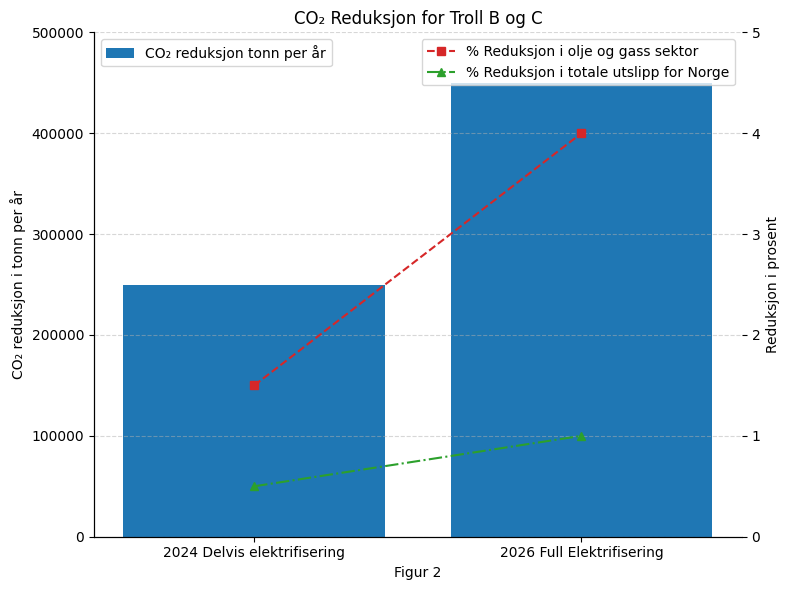

In [18]:
Prosjekt = ["2024 Delvis elektrifisering", "2026 Full Elektrifisering"]
Co2_reduksjon = [250000, 450000] 
prosent_reduksjon_oljeoggass_sektor = [1.5, 4]  
prosent_totale_utslipp = [0.5, 1]  

fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.set_xlabel('Figur 2')
ax1.set_ylabel('CO₂ reduksjon i tonn per år')
ax1.bar(Prosjekt,Co2_reduksjon, label="CO₂ reduksjon tonn per år")
ax1.tick_params(axis='y')
ax1.set_ylim(0, 500_000)
ax1.legend(loc="upper left")

ax2 = ax1.twinx()
ax2.set_ylabel('Reduksjon i prosent')
ax2.plot(Prosjekt, prosent_reduksjon_oljeoggass_sektor, marker='s',color='tab:red', linestyle='--', label="% Reduksjon i olje og gass sektor")
ax2.plot(Prosjekt, prosent_totale_utslipp, marker='^', color='tab:green', linestyle='-.', label="% Reduksjon i totale utslipp for Norge")
ax2.tick_params(axis='y')
ax2.set_ylim(0, 5)
ax2.legend(loc="upper right")

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.title("CO₂ Reduksjon for Troll B og C")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Elektrifisering av plattformene Troll B og C - lønnsomhetsvurdering 

I denne analysen vil jeg se nærmere på lønnsomheten ved elektrifiseringen av Troll B og Troll C. Per nå er Troll B og C delvis elektrifisert, mens Troll C er planlagt en full elektrifisering innen 2026. 

I 2021 ble de årlige utslippsreduksjonene som følge av TWEL-prosjektet anslått til å utgjøre ca. 450 000 tonn $CO_2$ per år, tilsvarende over tre prosent av de totale utslippene fra olje- og gassutvinning (Equinor, 2021). I september 2024 kunngjorde Equinor at plattformene B og C nå delvis drives av strøm fra land. Dette har reduserte utslippene på norsk sokkel med 250 000 tonn $CO_2$, som reduserer Norge sine totale årlige utslipp med omtrent en halv prosent. 
TWEL-prosjektet har som mål å fortsette elektrifiseringen, slik at Troll C blir fullt elektrifisert. Ved ferdigstillelse av full elektrifisering av Troll C skal de årlige utslippene reduseres med ytterligere 200 000 tonn $CO_2$. Den totale årlige reduksjonen i $CO_2$-utslipp er dermed beregnet til å være omtrent 450 000 tonn $CO_2$, som samsvarer med estimatet fra 2021. Totalt vil dette redusere Norges årlige utslipp med rundt én prosent og utslippene fra olje- og gassutvinning med nesten fire prosent. Infrastruktur på Kollsnes og kabelen til plattformen er designet for en eventuell full elektrifisering av Troll B på et senere tidspunkt (Equinor, 2024). Troll B skal bare bare delvis elektrifiseres, dette er på grunn av at plattformen også skal kunne fungere som en sikkerhetsventil i tilfelle strømbrudd. 
 
Figur 1.2 illusterer hvilken effekt en delvis elektrifisering og en full elektrifisering har på utslipp i olje og gasssektoren, og hvilken effekt det har på totale utslipp i Norge.  

De viktigste antakelsene og avgrensningene for lønnsomhetsvurderingen kan kort oppsummeres med følgende punkter:

- $CO_2$ utslipp og investeringskostander på Troll B og C: Her er det blitt anvendt tall oppgitt av Equinor (2024). 
- Karbonpriser er hentet fra regjeringen sin karbonpris bane for bruk i samfunnsøkonomiske analyser i 2024.
- Lønnsomhetsvurderingen anvender to strømpris prognoser. En strømpris bane er beregnet ved en lineær prognose basert på statnett sin langsiktige markedsanalyse 2022-2050 (2023), mens den andre prisbanen antar at strømprisene vil øke i takt med karbonprisene. 
- For å finne mengde frigjort gass er reduksjonen i $CO2-utslipp$ regnet tilbake til mengde naturgass ved å bruke gjennomsnittlige utslippsfaktorer.
- Gasspris er hentet fra den danske gassbørsen, Gaspoint Nordic. Disse prisene representerer markedsprisen på naturgass før nasjonale skatter, avgifter og karbonkostnader legges til. Gass prisutviklingen er regnet ved å anvende samme stigningstall som i karbonprisbanen fra regjeringen. 
- Oppgaven har sett bort i fra $CO2$ utslipp som kommer fra stålproduksjon.
- På grunn av manglende informasjon har oppgaven sett bort i fra vedlikeholdskostnader, og andre kostnader knyttet til driften av plattformene. 

### Kostnader 

Equinor har beregnet at investeringene knyttet til elektrifiseringen av Troll B og C vil beløpe seg til om lag 8.1 milliarder nok (Equinor, 2021). Prosjektet har fått tilegnet støtte ifra næringslivets NOx-fond på totalt 520 millioner norske kroner (Equinor, 2024). Investeringskostnaden sammen med strømkostnader og karbonpriser er de største komponentene i lønnsomhetsvurderingen, og er naturligvis avgjørende for prosjektets lønnsomhet. 

Elektrifiseringen krever store mengder elektrisitet, og for å beregne driftskostnadene for plattformene etter elektrifisering, trenger man fremtidige strømprisestimater. Det samlede strømforbruket for Troll B og C er anslått til 116 MW etter full elektrifisering (Equinor, 2024). Elektrisiteten vil bli overført til plattformene via en kabel fra Kollsnes til Troll B og videre fra Troll B til Troll C. Strømpriser i Norge og Norden påvirkes av lokale forhold, som vannkraft produksjon, vindkraftkapasitet, og overføringskapasitet mellom prisområder (Statnett, 2023). Internasjonalt er det ofte en sterkere sammenheng mellom gasspriser og strømpriser i land der gasskraftverk utgjør en betydelig del av kraftproduksjonen, fordi marginalkostnaden for gasskraft ofte setter strømprisen. I Norge er denne sammenhengen betydelig svakere, vannkraft står for 90% av total elektrisitetsproduksjonen (SSB, 2024), og dominerer derfor kraftproduksjonen. I lys av dette har lønnsomhetsvurderingen anvendt to strømpris prognoser, en prognose som forventer en avtagende strømpris frem mot 2055, og en som forventer en økende strømpris. 

#### Strømpris prognoser

Lønnsomhetsvurderingen har anvendt to ulike strømpris prognoser. I Statnetts langsiktige markedsanalyse er det en forventning om lavere strømpriser frem mot 2055, estimatene bygger på lavere gasspriser og et økt tilbud ny elektrisk kraft. Denne prognosen kan fremstå som noe optimistisk, og vurderingen har derfor i tilegg anvendt en prognose for å kompensere for dette. I den andre prognosen er det lagt inn en forventning om økte gasspriser, og ettersom behovet for elektrisk kraft øker som følge av overgangen til mer klimavennlig energi, at gass- og strømprisene øker. 

##### statnett prognose

Strømprisprognosen baserer seg på langsiktige priser hentet fra Statnetts markedsanalyse. Det er vanlig praksis i slik analyser at kraftprisene beregnes med bakgrunn i marginal kostnader, som inkluderer CO2-kvoter for fossile kraftverk. I denne analysen er ikke dette tatt hensyn til, ettersom at den norske el-miksen består av 90% vannkraft (SSB, 2024), på den andre siden har likevel strømprisene fulgt gassprisene, dette er fordi på Europa er helt avhengig av gasskraft, ettersom det frie gassmarkedet er betydelig større enn det frie el-markedet. Ved hjelp av en lineær prognose er de fremtidige strømprisene beregnet frem til 2055. Ifølge rapporten forventes et markant fall i strømprisene i hele Europa, inkludert Norge, som vil bli påvirket av tilknytningen til det europeiske kontinentet. Fallet i strømprisene drives av forventede lavere gasspriser og økt produksjon av fornybar energi. I tillegg forventes det at strømprisene i Sør-Norge vil nærme seg prisnivåene i resten av landet, noe som vil føre til mer ensartede priser over hele Norge (Statnett, 2023).

I statnetts basisscenario estimeres kraftprisen i Sør-Norge til å ligge mellom 50-70 euro per MWh fra 2025 til 2030, 45-55 euro per MWh i 2030 og 2035, og rundt 40 euro per MWh i 2040 og 2050. Disse prisene er omtrent på nivå med det historiske gjennomsnittet for perioden 2010-2020 (Statnett, 2023, s. 58). I denne analysen har disse tallene blitt brukt som et utgangspunkt (prognosen har brukt gjennomsnittet for de oppgitte periodene 2025-2030 og 2030-2050), det er også anvendt en lineær prognose for å estimere den årlige prisen i intervallene mellom disse. Rapporten oppgir ikke regional pris for sone NO5 (Kollsnes), derfor har analysen sett bort fra regionale forskjeller, og anvendt en strømpris som gjelder for hele Sør-Norge. Stattnetts rapport diskuterer også en forventet volitalitet i fremtidige strømpriser. Rapporten legger frem prognoser i både basisscenario, høy- og lavpris scenario. Volitalitet er en risiko for prosjekter som er avhengig av stabile energikostander. Denne lønnsomhetsvurdering har bare anvendt prisbanen som følger basisscenarioet.  

#### Prognose basert økende gasspriser  

Statnetts strømprisprognoser har en optimistisk tilnærming til fremtidige priser der den antar fallende strømpriser frem til 2055. Selv om disse estimatene er en del av vurderingen, bør de behandles med forsiktighet. For å kompensere, har vurderingen også inkludert en alternativ prognose basert på antagelser om en økning i fremtidige gasspriser. 

I denne overgangsperioden, der vi gradvis faser ut olje og gass til fordel for fornybar energi, forventes det at både gasspriser og strømpriser vil stige. Prognosen forutser en økning i strømprisene fram til 2035, hvoretter de forventes å stabilisere seg på et nivå som er $0,10$ øre høyere enn dagens pris på tilnærmet $0,70$ NOK/kWh. Denne prognosen reflekterer påvirkningen fra stigende gasspriser på strømprisene, men forutsetter en moderat prisvekst på grunn av regionale forskjeller. Dette tar særlig hensyn til det norske energimarkedet, som primært er basert på vannkraft. Her er det lagt inn en forventet årlig prisstigning på 2,2 prosent fram til 2035.

##### Strømbehov 

Plattformene vil sannsynligvis være i drift hele året. Med 8760 timer i året: 365 dager $\times$ 24 timer, kan man beregne det årlige strømforbruket. 

$$ Strømkostnad = strømforbruk (kWh) \times Årlige \; timer \times Årlig strømpris \; per \; kWh $$ 

$$ mWh \; Årlige timer = 116 mWh \times \; 8760 \; = 1 \; 016 \; 160 \; Årlige \; mWh $$

$$ mWh \rightarrow kWh \; = 1 016 160 \times 1000 = 1 \; 016 \; 160 \; 000 \; Årlige \; kWh $$

$$ Strømkostnad = 1 \; 016 \; 160 \; 000 \times Årlig \; strømpris \; prognose $$


####  Andre driftskostander

Selv om mye av den nye infrastrukturen er elektrisk, vil det fortsatt være behov for vedlikehold. Elektriske systemer krever mindre vedlikehold enn gassturbiner, det vil likevel være nødvendig med inspeksjoner, utskiftninger av komponenter og generelt vedlikehold. Dette vil også inkludere vedlikehold av kabelinfrastrukturen. 

Plattformene vil fortsatt bruke gass til de store eksportkompressorene inntil full elektrifisering av Troll C er fullført. Disse kostnadene vil reduseres over tid når gassen kan eksporteres i stedet for å brukes til kraftproduksjon. På grunn av mangelende informasjon har lønnsomhetsvurderingen sett bort i fra vedlikeholdskostnader. 

##### Frigjort gass 

Equinor (2024) oppgir at elektrifiseringen vil redusere utslippene med $450\;000 \;tonn \; CO2$. Dette kan brukes til å regne ut mengden frigjort gass ved elektrifisering av Troll B og C, ved å se på sammenhengen mellom CO2-utslipp og gassforbruk. Når naturgass forbrennes, produserer den $CO2$. Mengden $CO2$ produsert per kubikkmeter naturgass kan estimeres basert på gjennomsnittlige utslippsfaktorer. For naturgass er denne faktoren omtrent $2,34$ kg $CO2$ per kubikkmeter naturgass forbrent (avhengig av gassens sammensetning)(Miljodirektoratet).

Basert på tallene fra Equinor kan vi estimere hvor mye gass som frigøres ved å konvertere CO2-reduksjonen til gassvolum:

$Redusert \; gassforbruk (m^3) = \dfrac{Reduksjon \; i \; CO2-utslipp \; (tonn)}{CO2 \; per \; m^3 \; av \; gass}$

$\dfrac{450 \; 000 \; tonn \times \; 1000 \; kg}{2,34 \; m^3} = 192 \; 307 \; 692 \; m^3/år$

En typisk verdi som ofte brukes er at en kubikkmeter naturgass inneholder omtrent 35,315 British Thermal UNits. Hvis vi bruker 35,315 per kubikkmeter som en standard verdi, og man har ca. 166 millioner kubikkmeter $(m^3)$, ser regnestykket slik ut:

$MMBtu = 192 \; 307 \; 692 \; m^3 \times 35 \; 315BTU \times \dfrac{1}{1 \; 000 \; 000} = 6 \; 786 \; 002,15 MMBtu$.

Den frigjorte gassen kan selges i gassmarkedet og generere inntekter. Her vil det oppstå en sammenhengen mellom prisen på elektrisitet og prisen på gass, som kan påvirke hverandre i motsatt eller samme retning avhengig av hvilken strømprognose som anvendes. En høy gasspris vil øke verdien av den frigjorte gassen, samtidig som tilknytningen til kontinentet vil presse opp prisen på elektrisitet. Denne lønnsomhetsvurderingen har en to delt tilnærming til dette. I stattnetts prognose er det lagt inn en forventning om lavere gasspris som smitter over på en lavere pris på elektrisitet. Vurdering som foretas i denne analysen utforsker to scenarioer: en tilnærming der strømprisene øker, og en der strømprisene reduseres. Begge scenarioene i denne analysen antar en økning i salgsprisen på den frigjorte gassen, selv om Statnetts prognose ville tilsi en lavere pris på eksportert gass. Dette kan virke motsigende, men ettersom den totale mengden frigjort gass er relativt liten, er dens innvirkning på det samlede resultatet begrenset. Likevel er en antatt økning i salgsprisen på den frigjorte gassen inkludert i begge scenarioene, dette vil påvirke prosjektets lønnsomhet positivt, selv om disse effektene samlet sett er små. 

I lønnsomhets vurderingen er gassprisen estimert basert på et gjennomsnitt av gasspriser fra den danske gassbørsen, Gaspoint Nordic. Disse prisene representerer markedsprisen på naturgass før nasjonale skatter, avgifter og karbonkostnader legges til. Dette gjøres for å unngå dobbelttelling. Prisutviklingen er regnet ved å anvende samme stigningstall som i karbonpris banen fra regjeringen. Det er sannsynlig at gassprisene kan øke som en konsekvens av stigende karbonpriser, ettersom gass er et fossilt brennstoff og er underlagt karbonavgifter. Imidlertid er det flere faktorer som spiller inn på forholdet mellom gasspriser og karbonpriser. 

- Energimarkedets struktur og dynamikk. 
- Endringer i tilbud og etterspørsel etter naturgass. 
- Politiske beslutninger og reguleringer. 
- Utviklingen og adopsjon av alternative, renere energikilder. 

Karbonprisen kan likevel på sikt føre til en gradvis økning i gassprisene, spesielt dersom man legger vekt på miljøvennlige tiltak. Men dette er ingen garanti, og prisbanen vil være avhengig av mange variabler og usikkerhet i markedet. Effekten frigjort gass har på lønnsomheten til prosjektet er liten, nesten utbetydlig. Årlig frigjøres det 6 786 002 MMBtu gass som konsekvens av elektrifiserigen, og dersom denne gassen selges til en pris på 0,16 NOK per MMBtu (gjennomsnitt for 2023), vil det generere inntekter på omtrent 1,1 millioner kroner per år. På det meste vil den frigjorte gassen fra Troll B og C generere inntekter tilnærmet 4 millioner kroner. 

##### Reduksjonen i behovet for $CO_2$-kvoter

Elektrifiseringen av Troll B og C vil redusere CO2-utslippene med $450 \; 000$ tonn per år. For å finne de årlige økonomiske besparelsene som oppstår som følge av de reduserte CO2-utslippene må man bruke de gjeldene prisene per tonn CO2 kvoter. 

$$ Besparelser = Reduksjon\; i \; CO2-utslipp \times Pris \; per \; tonn \; CO2 $$

I denne lønnsomhetsvurderingen er regjeringens karbonprisbane for samfunnsøkonomiske analyser i 2024 benyttet. Karbonprisen inneholder tre forskjellige baner: en høy, en forventet, og en lav prisbane. Lønnsomhetsvurderingen tar i betraktning alle disse prisbanene, og for hver av dem utforsker den to ulike scenarioer for strømprisutviklingen: ett hvor strømprisen øker og ett hvor den avtar. Dette tilrettelegger for en omfattende analyse av hvordan ulike kombinasjoner av strøm- og karbonpriser kan påvirke prosjektets økonomiske levedyktighet.

### Nettonåverdi og internrente - differanse kontantstrøm

Når man har estimater for de relevante kostnadene og inntektene for prosjektet, kan man gå videre til å beregne nettonåverdi. Denne beregningen vil gi en helhetlig vurdering av lønnsomheten til elektrifiseringen av Troll B og C. NNV tar hensyn til tidsverdien av penger ved å diskontere fremtidige kontantstrømmer. Det er brukt en diskonteringsrente på 4%, som er satt sammen et inflasjonsmål og realrente på 2%. 

En nettonåverdi vurdering gir en klar indikasjon på om prosjektet skaper nettoverdi over tid. Det er blitt anvendt en differanse kontantstrøm, der besparelsene ved en elektrifisering, som unngåtte kostnader knyttet til $CO_2$-kvoter og NOx-avgift er lagt inn som inntekter. Ved anvendelse av differanse kontantstrøm er cash-flown til nullalternativet likt som for tiltaket (med motsatt fortegn), derfor behøver man ikke en lønnsomhets kalkyle for nullalternativet.

Det er lagt inn tre levetider til prosjektet, med en maksimal levetid på 30 år (regnet fra 2025), som vil si frem til 2050. Troll C hadde en opprinnelig forventet levetid til rundt 2020, men videre investeringer og oppgraderinger gjorde at Equinor utvidtet driftsperioden. I senere år har det vært planer om å forlenge levetiden til 2030, og sannsynligvis utover dette, avhengig av investeringer og vedlikehold. Levetiden er viktig for økonomien i et tiltak. Lønnsomhetsvurdering vil være ulik dersom man forventer en lang levetid sammenlignet med en forventning med nedstengning allerede i 2030. Erfaringen er at mange felt får en forlenget levetid fordi man modner frem egne ressurser og/eller at det knyttes nye felt til (Tennbakk et al, 2023, s. 32). 

##### Forventet prisbane (karbonpris) - økende strømpriser 

Tabell 1 viser tallene fra lønnsomhetsvurderingen med økende strømpriser. Vurderingen viser en negativ nettonåverdi for alle levetidene. Med en NNV på henholdsvis -3,3, -4 og -5,2 milliarder for 30, 20 og 10 års levetid. Dette betyr at prosjektet ikke blir lønnsomt i et tidsperspektiv under rammen som er gitt, og at prosjektet ikke burde gjennomføres. Videre viser negative internrenter at man ikke oppnår avkastningen på investeringen. Selvom det er en negativ NNV så reduseres denne utover levetiden, dette viser at prosjektet har en positiv kontantstrøm, men at investeringen og kostnadene er for høye relativt til inntektene som prosjektet genererer. 

In [19]:
from IPython.display import Markdown
print("Tabell 1: Forventet prisbane (karbonpriser) - økende strømpriser")
tbl=f"""
| Lønnsomhetsvurdering        | 30 år                       |           20 år         |  10 år  |  
|-------------------|:----------------------------:|----------------------: |---------------:|
| NNV               |   -kr 3 136 235 920         | -kr 4 021 551 591        | -kr 5 275 151 579 |       
| Internrente       |    -0,03%                    |   -3,6%                | -14,8%              |   
"""
display(Markdown(tbl))

Tabell 1: Forventet prisbane (karbonpriser) - økende strømpriser



| Lønnsomhetsvurdering        | 30 år                       |           20 år         |  10 år  |  
|-------------------|:----------------------------:|----------------------: |---------------:|
| NNV               |   -kr 3 136 235 920         | -kr 4 021 551 591        | -kr 5 275 151 579 |       
| Internrente       |    -0,03%                    |   -3,6%                | -14,8%              |   


##### Forventet prisbane - avtagende strømpriser 

Tabell 2 viser tallene fra lønnsomhetsvurderingen med avtagende strømpriser over tid. Disse er i tråd med statnetts markedsanalyse. Her observeres det at ved en 30-års levetid vil prosjektet ha en positiv nåverdi (NPV) på ca. 1,6 milliarder og en internrente på 5,5 %. Kortere levetid gir imidlertid negative resultater: en NPV på -733 millioner NOK for en 20-års periode og -4,1 milliarder NOK for 10 år, med tilhørende internrenter på henholdsvis 3,0 % og -8,1 %. Dette skyldes høy investeringskostnad ved oppstart, som ikke kompenseres raskt nok av driftsinntektene. 

Tilbakebetalingstiden for prosjektet er beregnet til 15,3 år, men det tar 23 år før den diskonterte kontantstrømmen blir positiv som bedre reflekterer proskjektes lønnsomhet. Med andre ord må prosjektet ha en levetid på over 23 år for å bli lønnsomt i et nåverdi-perspektiv.

In [20]:
from IPython.display import Markdown
print("Tabell 2: Forventet prisbane (karbonpriser) - avtagende strømpriser")
tbl=f"""
| Lønnsomhetsvurdering         | 30 år                       |           20 år         |  10 år           |  
|-------------------|:----------------------------:|----------------------: |---------------:|
| NPV               |   kr 1 666 499 194,00 | -kr 733 188 355,39 | -kr 4 124 637 741,12|       
| Internrente       |    5,5%                    |   3,0%                | -8,1%              |   
"""
display(Markdown(tbl))

Tabell 2: Forventet prisbane (karbonpriser) - avtagende strømpriser



| Lønnsomhetsvurdering         | 30 år                       |           20 år         |  10 år           |  
|-------------------|:----------------------------:|----------------------: |---------------:|
| NPV               |   kr 1 666 499 194,00 | -kr 733 188 355,39 | -kr 4 124 637 741,12|       
| Internrente       |    5,5%                    |   3,0%                | -8,1%              |   


##### Vurdering - forventet prisbane 

Basert på forventede prisbaner for karbonpriser, understreker analysen viktigheten av prosjektets levetid og strømpriser. For scenarioet med økende strømpriser viser resultatene en konsekvent negativ nettonåverdi på alle beregnede levetider, med verdiene -3,3, -4 og -5,2 milliarder for henholdsvis 30, 20 og 10 års levetid. Dette indikerer at prosjektet ikke er blir lønnsomt, og at det sannsynligvis ikke bør gjennomføres, gitt at også internrentene er negative.

I scenarioet med avtagende strømpriser, i tråd med statnetts markedsanalyse, viser resultatene at prosjektet har en positiv nåverdi (NPV) på omtrent 1,6 milliarder og en internrente på 5,5 % ved en levetid på 30 år. Kortere levetider resulterer imidlertid i negative NPV-verdier og internrenter, noe som reflekterer den høye investeringskostnaden som ikke kompenseres raskt nok av driftsinntektene.

Samlet viser analysene at lengre levetider forbedrer lønnsomheten. Tilbakebetalingstiden og tidspunktet for når den diskonterte kontantstrømmen blir positiv, ved avtagende strømpriser, understreker behovet for en levetid på over 23 år for å realisere en lønnsom investering. Det er svært usikkert om strømprisene faktisk vil falle frem mot 2055, og om plattformene vil kunne opprettholde driften i ytterligere 23 år. Disse funnene bør veilede beslutningstakere i deres vurderinger av investeringsbeslutninger, spesielt i lys av strømpriser og prosjektets avhengighet av lange driftsperioder for å oppnå lønnsomhet. 

##### Høy prisbane - økende strømpriser

Tabell 3 viser resultater under høyprisbane, med en økende strømpris. Fordi prisen på CO2-kvoter er regnet som en inntekt, viser nettonåverdien signifikante besparelser, som dermed gir positiv netto nåverdi ved lengre driftsperioder. Driftsperioder på 30 og 20 år har en netto nåverdi på henholdsvis 14,9 og 4,5 milliarder. Disse resultatene indikerer at dersom karbonprisene øker utover dagens forventninger, vil elektrifiseringen av Troll B og C representere en lønnsom investering som bør gjennomføres.

In [21]:
from IPython.display import Markdown
print("Tabell 3: Høy prisbane - økende strømpriser")
tbl=f"""
| Lønnsomhetsvurdering         | 30 år                       |           20 år         |  10 år           |  
|-------------------|:----------------------------:|----------------------: |---------------:|
| NPV               |   kr 14 920 138 181  | kr 4 570 173 712 202  | -kr 3 403 059 316 |       
| Internrente       |    11,1%                    |   8,1%                | -4,9%              |   
"""
display(Markdown(tbl))

Tabell 3: Høy prisbane - økende strømpriser



| Lønnsomhetsvurdering         | 30 år                       |           20 år         |  10 år           |  
|-------------------|:----------------------------:|----------------------: |---------------:|
| NPV               |   kr 14 920 138 181  | kr 4 570 173 712 202  | -kr 3 403 059 316 |       
| Internrente       |    11,1%                    |   8,1%                | -4,9%              |   


##### Høy prisbane - avtagende strømpriser 

Tabell 4 viser resultater med høy karbonpris, og avtagende strømpris. Med en driftsperiode på henholdsvis 30 og 20 år viser nettonåverdien 19,7 og 7,8 milliarder, med tilhørende internrenter på 12,8 % og 10,5 %. Prosjektet er naturligvis mer lønnsomt under avtagende strømpriser, og resultatene tyder på en solid avkastning på investeringen.

In [22]:
from IPython.display import Markdown
print("Tabell 4: Høy prisbane - avtagende strømpriser")
tbl=f"""
| Lønnsomhetsvurdering         | 30 år                       |           20 år         |  10 år           |  
|-------------------|:----------------------------:|----------------------: |---------------:|
| NPV               |   kr 19 738 844 482  | kr 7 866 464 202  | -kr -2 250 244 369 |       
| Internrente       |    12,88%                    |   10,5%                | -1,0%              |   
"""
display(Markdown(tbl))

Tabell 4: Høy prisbane - avtagende strømpriser



| Lønnsomhetsvurdering         | 30 år                       |           20 år         |  10 år           |  
|-------------------|:----------------------------:|----------------------: |---------------:|
| NPV               |   kr 19 738 844 482  | kr 7 866 464 202  | -kr -2 250 244 369 |       
| Internrente       |    12,88%                    |   10,5%                | -1,0%              |   


##### Lav prisbane - økende strømpriser

Tabell 5 viser resulatene med en lav karbonprisbane, ved en økende strømpris. Dette scenarioet er det minst lønnsomme, ettersom lav karbonpris gir en lav besparelse (inntekt), og en økende strømpris gjør driften av plattformene dyrere. Observerer negative nåverdier for alle levetider, internrenter er ikke tilgjengelige ettersom netto nåverdi ikke kan bli null, dette indikerer en negativ kontantstrøm, som betyr at driften ikke er lønnsom. 

In [23]:
from IPython.display import Markdown
print("Tabell 5: Lav prisbane - økende strømpriser")
tbl=f"""
| Lønnsomhetsvurdering         | 30 år                       |           20 år         |  10 år           |  
|-------------------|:----------------------------:|----------------------: |---------------:|
| NPV               |   -kr 12 946 694 785  | -kr 12 645 797 718    | -kr 10 800 892 488 |  
| Internrente       |    N/A                    |   N/A                | N/A             |   
"""
display(Markdown(tbl))

Tabell 5: Lav prisbane - økende strømpriser



| Lønnsomhetsvurdering         | 30 år                       |           20 år         |  10 år           |  
|-------------------|:----------------------------:|----------------------: |---------------:|
| NPV               |   -kr 12 946 694 785  | -kr 12 645 797 718    | -kr 10 800 892 488 |  
| Internrente       |    N/A                    |   N/A                | N/A             |   


##### Lav prisbane - avtagende strømpriser

Tabell 6 viser lav karbonpris, med en avtagende strømpris. Her ser man at kontantstrømmen igjen blir positiv i løpet av driften. Når karbonprisene øker og strømprisene avtar vil kontantstrømmen på sikt igjen bli positiv. Nettonåverdien er likevel negativ for alle levetidene, som viser at prosjektet er helt avhengig av høye nok karbonpriser for at lønnsomheten ved elektrifiseringen skal kompensere for den høye investeringskostnaden. 


In [24]:
from IPython.display import Markdown
print("Tabell 6: Lav prisbane - avtagende strømpriser")
tbl=f"""
| Lønnsomhetsvurdering         | 30 år                       |           20 år         |  10 år           |  
|-------------------|:----------------------------:|----------------------: |---------------:|
| NPV               |   -kr 8 127 484 785  | -kr 9 349 507 228   | -kr 9 648 077 541 |  
| Internrente       |    -3,71%                    |   -14,8%                | N/A             |   
"""
display(Markdown(tbl))

Tabell 6: Lav prisbane - avtagende strømpriser



| Lønnsomhetsvurdering         | 30 år                       |           20 år         |  10 år           |  
|-------------------|:----------------------------:|----------------------: |---------------:|
| NPV               |   -kr 8 127 484 785  | -kr 9 349 507 228   | -kr 9 648 077 541 |  
| Internrente       |    -3,71%                    |   -14,8%                | N/A             |   


#### Forutsetninger for en vellykket gjennomføring 



##### Anbefaling

#### Litteraturhenvisning 

CICERO. (2013). CICERO Report 2013:03. Tilgjengelig fra: https://pub.cicero.oslo.no/cicero-xmlui/bitstream/handle/11250/191958/CICERO_Report_2013-03.pdf?sequence=1&isAllowed=y

Direktoratet for forvaltning og økonomistyring (DFØ), u.å. Veileder i samfunnsøkonomiske analyser: En innføring i hvordan statlige tiltak skal utredes. Tilgjengelig på: https://dfo.no/fagomrader/utredning-og-analyse-av-statlige-tiltak/samfunnsokonomiske-analyser/veileder-i-samfunnsokonomiske-analyser/1-en-innforing-i-hvordan-statlige-tiltak-skal-utredes (02.09.2024).

Equinor. (2021, 21. April). "Utbyggingsplaner for elektrifisering av Troll Vest overleveres myndighetene". Hentet 21.09.2024 fra https://www.equinor.com/no/news/archive/20210423-development-plans-troll-west-electrification

Equinor. (2024, 11. September). "Reducing emissions from the troll field". Hentet 21.09.2024 fra: https://www.equinor.com/news/20240911-reducing-emissions-troll-field

International Energy Agency. (2024). World Energy Outlook 2024. IEA. Tilgjengelig fra: https://www.iea.org/reports/world-energy-outlook-2024#downloads

Miljodirektoratet. Sist oppdatert 20.06.2022. Tilgjengelig fra: https://www.miljodirektoratet.no/ansvarsomrader/klima/klimagasser-utslippstall-regnskap/utslippsfaktorer-klimagassregnskap/

NOx fondet. "Forventet kraftig økning i innbetalingssatsene". Hentet 25.10.2024 fra: https://www.noxfondet.no/nyheter/forventet-kraftig-okning-i-innbetalingssatsene/

Regjeringen. "Karbonprisbaner for bruk i samfunnsøkonomiske analyser i 2024". Hentet 22.10.2024 fra: https://www.regjeringen.no/no/tema/okonomi-og-budsjett/statlig-okonomistyring/karbonprisbaner-for-bruk-i-samfunnsokonomiske-analyser-i-2024/id3020031/

SSB (2024). Elektrisitet.Tilgjengelig fra: https://www.ssb.no/energi-og-industri/energi/statistikk/elektrisitet

Statnett (2022). Langsiktig markedsanalyse 2022–2050. Tilgjengelig fra: https://www.statnett.no/globalassets/for-aktorer-i-kraftsystemet/planer-og-analyser/lma/langsiktig-markedsanalyse-2022-2050.pdf

Statistisk sentralbyrå. (2023). Klar nedgang i utslipp av klimagasser i 2023. Tilgjengelig fra: https://www.ssb.no/natur-og-miljo/forurensning-og-klima/statistikk/utslipp-til-luft/artikler/klar-nedgang-i-utslipp-av-klimagasser-i-2023

Sodir (2020). Ti ekstra år for Troll B. Oppdatert: 23.07.2024. Tilgjengelig fra: https://www.sodir.no/aktuelt/nyheter/generelle-nyheter/2020/ti-ekstra-ar-for-troll-b/

Tennbakk, B., Næss Jebsen, S. H., Kirchner, B., & Eriksrud, A. L. (2023). Elektrifisering av olje- og gassektoren – har det global klimaeffekt? Rapportnummer 2022-23. Offshore Norge. Tilgjengelig fra: https://uit-sok-2014-h24.github.io/articles/thema-rapport-2022-23_elektrifisering.pdf

Trading Economics. "Natural-Gass - Futureskontrakt - Priser". Hentet 17.10.2024 fra: https://no.tradingeconomics.com/commodity/natural-gas

Tjåland, M. (2022). Market potential for offshore hydrogen production in Norway (Masteroppgave, Universitetet i Stavanger). Brage. Tilgjengelig fra: https://hdl.handle.net/11250/3022371